## Libraries and settings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")

print(os.getcwd())

/workspaces/data_analytics_project/notebooks


## Loading data

In [2]:
# Load merged data
df = pd.read_csv("../data/merged_weather_bikes.csv")
df["time"] = pd.to_datetime(df["time"])

print("Data shape:", df.shape)
print("\nFirst rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

Data shape: (8737, 6)

First rows:
                 time  temperature_2m  humidity  wind_speed_10m  \
0 2023-01-01 00:00:00             7.0        80             6.2   
1 2023-01-01 01:00:00             7.9        80            10.3   
2 2023-01-01 02:00:00             8.7        75             6.1   
3 2023-01-01 03:00:00             7.6        80             8.1   
4 2023-01-01 04:00:00             8.5        75             8.0   

   precipitation  bike_count  
0            0.0   23.934283  
1            0.0   11.234714  
2            0.0   26.953771  
3            0.0   44.460597  
4            0.0    9.316933  

Basic statistics:
                      time  temperature_2m     humidity  wind_speed_10m  \
count                 8737     8737.000000  8737.000000     8737.000000   
mean   2023-07-02 00:00:00       11.337770    78.538057        7.412830   
min    2023-01-01 00:00:00       -9.900000    26.000000        0.000000   
25%    2023-04-02 00:00:00        5.000000    69.000000  

## Exploratory Data Analysis

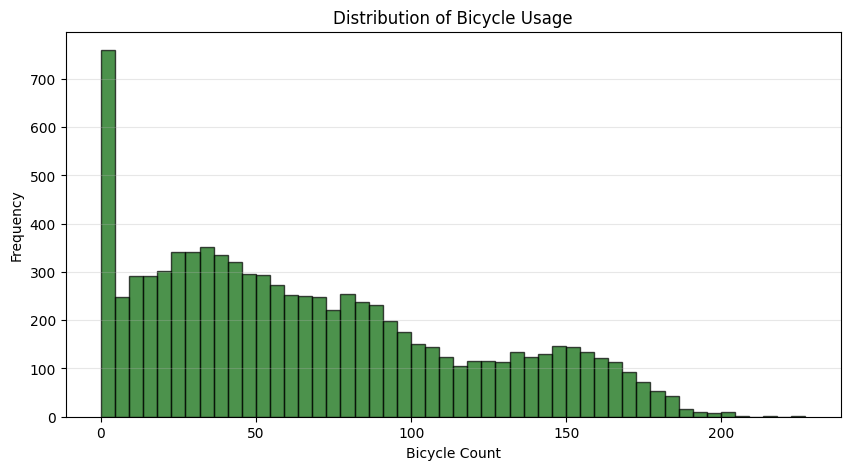

Bicycle count statistics:
Mean: 67.72
Median: 57.72
Std Dev: 50.55


In [3]:
# Histogram of bicycle counts
plt.figure(figsize=(10, 5))
plt.hist(df["bike_count"], bins=50, color="darkgreen", alpha=0.7, edgecolor="black")
plt.xlabel("Bicycle Count")
plt.ylabel("Frequency")
plt.title("Distribution of Bicycle Usage")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Bicycle count statistics:")
print(f"Mean: {df['bike_count'].mean():.2f}")
print(f"Median: {df['bike_count'].median():.2f}")
print(f"Std Dev: {df['bike_count'].std():.2f}")

In [ ]:
# Time series plot: temperature over time (sample every 24 hours for clarity)
sample_df = df[::24].copy()

plt.figure(figsize=(12, 5))
plt.plot(sample_df["time"], sample_df["temperature_2m"], color="darkorange", linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Temperature statistics:")
print(f"Mean: {df['temperature_2m'].mean():.2f}°C")
print(f"Min: {df['temperature_2m'].min():.2f}°C")
print(f"Max: {df['temperature_2m'].max():.2f}°C")

In [ ]:
# Scatter plot: temperature vs bicycle count
plt.figure(figsize=(10, 6))
plt.scatter(df["temperature_2m"], df["bike_count"], alpha=0.3, color="blue", s=10)
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Count")
plt.title("Relationship between Temperature and Bicycle Usage")
plt.grid(alpha=0.3)
plt.show()

# Calculate correlation
corr_temp_bikes = df["temperature_2m"].corr(df["bike_count"])
print(f"Correlation (Temperature vs Bike Count): {corr_temp_bikes:.3f}")

In [ ]:
# Scatter plot: precipitation vs bicycle count
plt.figure(figsize=(10, 6))
plt.scatter(df["precipitation"], df["bike_count"], alpha=0.3, color="red", s=10)
plt.xlabel("Precipitation (mm)")
plt.ylabel("Bicycle Count")
plt.title("Relationship between Precipitation and Bicycle Usage")
plt.grid(alpha=0.3)
plt.show()

# Calculate correlation
corr_precip_bikes = df["precipitation"].corr(df["bike_count"])
print(f"Correlation (Precipitation vs Bike Count): {corr_precip_bikes:.3f}")

In [ ]:
# Correlation matrix
numeric_cols = ["temperature_2m", "humidity", "wind_speed_10m", "precipitation", "bike_count"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")

# Add correlation values to cells
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                        ha="center", va="center", color="black", fontsize=9)

plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix)

## K-means Clustering Analysis

In [ ]:
# Prepare features for clustering
# Extract hour and day of week as additional features
df["hour"] = df["time"].dt.hour
df["dayofweek"] = df["time"].dt.dayofweek

# Select features for clustering
clustering_features = ["temperature_2m", "precipitation", "humidity", "hour", "bike_count"]
X = df[clustering_features].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features for clustering:")
print(clustering_features)
print(f"\nScaled data shape: {X_scaled.shape}")

In [ ]:
# Elbow method to find optimal k
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

print("Elbow method results:")
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette:.3f}")

In [ ]:
# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1.plot(k_range, inertias, marker="o", color="darkgreen", linewidth=2)
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method")
ax1.grid(alpha=0.3)

# Silhouette score plot
ax2.plot(k_range, silhouette_scores, marker="o", color="darkorange", linewidth=2)
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score vs k")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Train final k-means model with optimal k
optimal_k = 3  # Based on elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)
df["cluster"] = clusters

print(f"Optimal k: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"\nCluster distribution:")
print(df["cluster"].value_counts().sort_index())

In [ ]:
# Visualize clusters (temperature vs bike_count)
plt.figure(figsize=(10, 6))
colors = ["blue", "red", "green"]

for cluster in range(optimal_k):
    mask = df["cluster"] == cluster
    plt.scatter(df[mask]["temperature_2m"], df[mask]["bike_count"], 
               label=f"Cluster {cluster}", alpha=0.5, s=20, color=colors[cluster])

# Plot cluster centers (transformed back to original scale)
centers_scaled = kmeans_final.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
plt.scatter(centers_original[:, 0], centers_original[:, 4], 
           marker="X", s=300, color="black", edgecolors="white", linewidths=2, label="Centroids")

plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Count")
plt.title(f"K-means Clusters (k={optimal_k})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Cluster interpretation
print("\nCluster Characteristics:")
for cluster in range(optimal_k):
    cluster_data = df[df["cluster"] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Size: {len(cluster_data)} observations")
    print(f"  Avg Temperature: {cluster_data['temperature_2m'].mean():.2f}°C")
    print(f"  Avg Precipitation: {cluster_data['precipitation'].mean():.2f} mm")
    print(f"  Avg Humidity: {cluster_data['humidity'].mean():.2f}%")
    print(f"  Avg Bike Count: {cluster_data['bike_count'].mean():.2f}")

### Jupyter notebook --footer info--

In [ ]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')